In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as ss
from sklearn import tree

In [3]:
#load data, in sparse format
def load_data(filename):
    f = open('dorothea/%s.data' % filename)
    I,J = [],[]
    for k in range(100000):
        line = f.readline()
        if len(line) == 0:
            print('done')
            break

        line = [int(x) for x in line.split()]
        J.extend(line)
        I.extend(k for i in range(len(line)))

    return ss.coo_matrix((np.ones(len(I)), (I,J)))


def load_labels(filename):
    f = open('dorothea/%s.labels' % filename)
    y = []
    for k in range(100000):
        line = f.readline()
        
        if len(line) == 0:
            print('done')
            break
        y.append(int(line))
    return np.array(y)


Xtrain = load_data('dorothea_train')
ytrain = load_labels('dorothea_train')

Xtest= load_data('dorothea_valid')
ytest = load_labels('dorothea_valid')

print( Xtrain.shape,  Xtest.shape, Xtrain.nnz)
# print(Xtrain.size)

print("Number of features:", Xtrain.shape[1])
print("Number of labels:", len(set(ytrain)) )
print("Sparsity:", ((Xtrain.size - Xtrain.nnz) + (Xtest.size - Xtest.nnz)) / (Xtrain.size+Xtest.size))


done
done
done
done
(800, 100001) (350, 100001) 727760
Number of features: 100001
Number of labels: 2
Sparsity: 0.0


In [4]:


print (Xtrain)

  (0, 191)	1.0
  (0, 367)	1.0
  (0, 614)	1.0
  (0, 634)	1.0
  (0, 711)	1.0
  (0, 1202)	1.0
  (0, 1220)	1.0
  (0, 1311)	1.0
  (0, 1472)	1.0
  (0, 1730)	1.0
  (0, 2281)	1.0
  (0, 2572)	1.0
  (0, 2602)	1.0
  (0, 2611)	1.0
  (0, 2824)	1.0
  (0, 2855)	1.0
  (0, 2940)	1.0
  (0, 3149)	1.0
  (0, 3313)	1.0
  (0, 3560)	1.0
  (0, 3568)	1.0
  (0, 3824)	1.0
  (0, 4185)	1.0
  (0, 4266)	1.0
  (0, 4366)	1.0
  :	:
  (799, 97876)	1.0
  (799, 97899)	1.0
  (799, 98032)	1.0
  (799, 98266)	1.0
  (799, 98277)	1.0
  (799, 98301)	1.0
  (799, 98342)	1.0
  (799, 98353)	1.0
  (799, 98413)	1.0
  (799, 98419)	1.0
  (799, 98448)	1.0
  (799, 98458)	1.0
  (799, 98468)	1.0
  (799, 98635)	1.0
  (799, 98892)	1.0
  (799, 99118)	1.0
  (799, 99337)	1.0
  (799, 99621)	1.0
  (799, 99625)	1.0
  (799, 99739)	1.0
  (799, 99745)	1.0
  (799, 99755)	1.0
  (799, 99828)	1.0
  (799, 99955)	1.0
  (799, 99967)	1.0


In [5]:
def get_class_balance(y):
    pr_1 = np.count_nonzero(ytrain==1)/len(ytrain)
    return pr_1,1-pr_1

print ('class balance is currently %.2f  +1, %.2f -1' % get_class_balance(ytrain))

class balance is currently 0.10  +1, 0.90 -1


In [6]:
def get_misclass(y,yhat):
    count = 0
    for i in range(len(y)):
        if(y[i] != yhat[i]):
            count+=1
    return (count / len(y))



def get_f1(y,yhat):
    #fill me in
    detected = 0
    retrieved = 0
    relevant = 0
    for i in range(len(y)):
        if(y[i]==1 and yhat[i]==1):
            detected += 1
        if(y[i]==1):
            relevant += 1
        if(yhat[i]==1):
            retrieved += 1
    P = detected / retrieved
    R = detected / relevant
    return (2*P*R)/(P+R)

depth = 3
clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=depth, class_weight='balanced')
clf = clf.fit(Xtrain, ytrain)

print("Train Misclassification:",get_misclass(ytrain, clf.predict(Xtrain) ))
print("Test Misclassification:", get_misclass(ytest, clf.predict(Xtest) ))
print("Train F1:" , get_f1(ytrain, clf.predict(Xtrain) ))
print ("Test F1:", get_f1(ytest, clf.predict(Xtest) ))

Train Misclassification: 0.04125
Test Misclassification: 0.07428571428571429
Train F1: 0.7724137931034484
Test F1: 0.5806451612903226


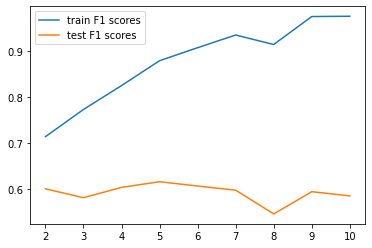

In [7]:
depths = range(2,11)
train_f1 = []
test_f1 = []
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=depth, class_weight='balanced')
    clf = clf.fit(Xtrain, ytrain)
    train_f1.append(get_f1(ytrain, clf.predict(Xtrain)))
    test_f1.append(get_f1(ytest, clf.predict(Xtest)))
    
    
plt.plot(depths, train_f1, label="train F1 scores")
plt.plot(depths, test_f1, label="test F1 scores")
plt.legend()
plt.show()

2 , 1 : 0.5454545454545454
3 , 1 : 0.6
4 , 1 : 0.6086956521739131
5 , 1 : 0.6363636363636364
6 , 1 : 0.6666666666666667
7 , 1 : 0.5161290322580645
8 , 1 : 0.5384615384615385
9 , 1 : 0.56
10 , 1 : 0.64
avg: 0.5901967857087072
test: 0.625
2 , 2 : 0.4444444444444444
3 , 2 : 0.34615384615384615
4 , 2 : 0.4444444444444444
5 , 2 : 0.3783783783783784
6 , 2 : 0.4444444444444444
7 , 2 : 0.4117647058823529
8 , 2 : 0.4444444444444444
9 , 2 : 0.3783783783783784
10 , 2 : 0.3783783783783784
avg: 0.40787016277212357
test: 0.5862068965517241
2 , 3 : 0.7272727272727273
3 , 3 : 0.7272727272727273
4 , 3 : 0.6857142857142857
5 , 3 : 0.6666666666666667
6 , 3 : 0.5714285714285714
7 , 3 : 0.5714285714285715
8 , 3 : 0.5555555555555555
9 , 3 : 0.6153846153846154
10 , 3 : 0.5
avg: 0.6245248578581912
test: 0.6129032258064516
2 , 4 : 0.5263157894736842
3 , 4 : 0.4210526315789474
4 , 4 : 0.4210526315789474
5 , 4 : 0.5
6 , 4 : 0.3448275862068966
7 , 4 : 0.5714285714285713
8 , 4 : 0.47619047619047616
9 , 4 : 0.45454

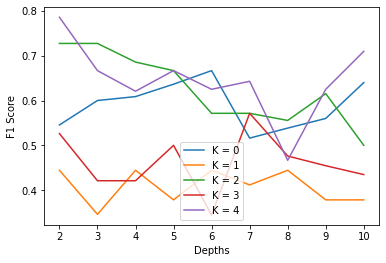

In [11]:
# def k_fold_cross(k, depth):
#     depths = range(2,depth+1)
#     set_len = int(Xtrain.shape[0] / k)
#     average_f1 = []
#     test_f1 = []
#     for depth in depths: 
#         clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=depth, class_weight='balanced')
        
#         best_clf = None
#         best_f1 = 0
#         valid_f1 = []
#         for i in range(k):
#             a = Xtrain.toarray()[0:i*set_len]
#             b = Xtrain.toarray()[(i+1)*set_len:Xtrain.shape[0]]

#             partitioned_Xtrain = np.concatenate((a, b))
#             partitioned_Xvalid = Xtrain.toarray()[i*set_len: (i+1)*set_len]
            
#             partitioned_ytrain = np.concatenate((ytrain[0:i*set_len],ytrain[(i+1)*set_len:len(ytrain)]))
#             partitioned_yvalid = ytrain[i*set_len: (i+1)*set_len]

#             clf = clf.fit(partitioned_Xtrain, partitioned_ytrain)
            
#             f1 = get_f1(partitioned_yvalid, clf.predict(partitioned_Xvalid))
#             valid_f1.append(f1)
#             print(depth,",",i+1,":",f1)
#             if(f1 > best_f1):
#                 best_clf = clf
#                 best_f1 = f1
# #         print(best_f1)
#         average_f1.append(np.mean(valid_f1))
#         print("avg:",average_f1[-1])
#         test_f1.append(get_f1(ytest, best_clf.predict(Xtest)))
#         print("test:",test_f1[-1])
#         plt.plot(range(1,k+1), valid_f1, label = "Depth {}".format(depth))
        
#         plt.legend()
#         plt.show()
    
#     plt.plot(depths, average_f1, label = "average f1")
#     plt.plot(depths, test_f1, label = "test f1")
#     plt.legend()
#     plt.show()
    
# k_fold_cross(5, 10)

def k_fold_cross(k, depth):
    depths = range(2,depth+1)
    set_len = int(Xtrain.shape[0] / k)
    average_f1 = []
    test_f1 = []
    
    for i in range(k):
        a = Xtrain.toarray()[0:i*set_len]
        b = Xtrain.toarray()[(i+1)*set_len:Xtrain.shape[0]]

        partitioned_Xtrain = np.concatenate((a, b))
        partitioned_Xvalid = Xtrain.toarray()[i*set_len: (i+1)*set_len]

        partitioned_ytrain = np.concatenate((ytrain[0:i*set_len],ytrain[(i+1)*set_len:len(ytrain)]))
        partitioned_yvalid = ytrain[i*set_len: (i+1)*set_len]
        
        partitioned_Xtrain = ss.coo_matrix(partitioned_Xtrain)
        partitioned_Xvalid = ss.coo_matrix(partitioned_Xvalid)
        best_clf = None
        best_f1 = 0
        valid_f1 = []
        for depth in depths: 
            clf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=depth, class_weight='balanced')

            clf = clf.fit(partitioned_Xtrain, partitioned_ytrain)
            
            f1 = get_f1(partitioned_yvalid, clf.predict(partitioned_Xvalid))
            valid_f1.append(f1)
            print(depth,",",i+1,":",f1)
            if(f1 > best_f1):
                best_clf = clf
                best_f1 = f1
#         print(best_f1)
        average_f1.append(np.mean(valid_f1))
        print("avg:",average_f1[-1])
        test_f1.append(get_f1(ytest, best_clf.predict(Xtest)))
        print("test:",test_f1[-1])
        plt.plot(depths, valid_f1, label = "K = {}".format(i))
    plt.xlabel("Depths")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.show()
    
#     plt.plot(depths, average_f1, label = "average f1")
#     plt.plot(depths, test_f1, label = "test f1")
#     plt.xlabel("Depths")
#     plt.ylabel("F1 Score")
#     plt.legend()
#     plt.show()
    
k_fold_cross(5, 10)

NameError: name 'Xtrain' is not defined